# Color-magnitude diagram: broadband filters

This tutorial shows how to create a color-magnitude diagram that includes data of field and young/low-gravity objects, synthetic photometry computed from isochrones and model spectra, and data of directly imaged objects.

## Initiating *species*

We start by importing the required modules.

In [1]:
import numpy as np
from species import SpeciesInit
from species.data.database import Database
from species.read.read_color import ReadColorMagnitude
from species.read.read_isochrone import ReadIsochrone
from species.read.read_planck import ReadPlanck
from species.plot.plot_spectrum import plot_spectrum
from species.plot.plot_color import plot_color_magnitude

Next, we initiate the [species](https://species.readthedocs.io/en/latest/species.html) workflow and create an instance of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database).

In [2]:
SpeciesInit()
database = Database()

species

Version: 0.9.1.dev64+g1d42feb.d20250418
Working folder: /Users/tomasstolker/applications/species/docs/tutorials

Creating species_config.ini... [DONE]
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]

Configuration settings:
   - Database: species_database.hdf5
   - Data folder: data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py not installed


## Adding data to the database

Available magnitudes and spectra of directly imaged planets and brown dwarfs are added to the database with [add_companion](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_companion) by setting `name=None`. These data are extracted from the [companion_data](https://github.com/tomasstolker/species/blob/master/species/data/companion_data/companion_data.json) and [companion_spectra](https://github.com/tomasstolker/species/blob/master/species/data/companion_data/companion_spectra.json) files in the [companion_data](https://species.readthedocs.io/en/latest/species.data.companion_data.html) subpackage.

In [3]:
database.add_companion(name=None, verbose=False)

Add companion: ['AF Lep b', 'beta Pic b', 'beta Pic c', 'HIP 65426 b', 'HIP 99770 b', '51 Eri b', 'HR 8799 b', 'HR 8799 c', 'HR 8799 d', 'HR 8799 e', 'HD 95086 b', 'PDS 70 b', 'PDS 70 c', '2M 1207 B', 'AB Pic B', 'HD 206893 B', 'HD 206893 c', 'RZ Psc B', 'GQ Lup B', 'PZ Tel B', 'kappa And b', 'HD 1160 B', 'ROXs 12 B', 'ROXs 42 Bb', 'GJ 504 b', 'GJ 758 B', 'GU Psc b', '2M0103 ABb', '1RXS 1609 B', 'GSC 06214 B', 'HD 72946 B', 'HIP 64892 B', 'HD 13724 B', 'YSES 1 b', 'YSES 1 c', 'HD 142527 B', 'CS Cha B', 'CT Cha B', 'SR 12 C', 'DH Tau B', 'HD 4747 B', 'HR 3549 B', 'CHXR 73 B', 'HD 19467 B', 'b Cen (AB)b', 'eps Ind Ab', 'VHS 1256 B']


100%|████████████████████████████████████████| 288k/288k [00:00<00:00, 337MB/s]


Adding spectrum: Vega


Reference: Bohlin et al. 2014, PASP, 126
URL: https://ui.adsabs.harvard.edu/abs/2014PASP..126..711B/abstract


/Users/tomasstolker/applications/species/species/data/database.py:1496: UserWarning: Found 33 fluxes with NaN in the data of GPI_YJHK. Removing the spectral fluxes that contain a NaN.
  warnings.warn(
/Users/tomasstolker/applications/species/species/data/filter_data/filter_data.py:282: UserWarning: The minimum transmission value of Subaru/CIAO.z is smaller than zero (-1.80e-03). Wavelengths with negative transmission values will be removed.
  warnings.warn(


We also add the photometry and parallaxes of the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html).

In [4]:
database.add_photometry('vlm-plx')


-----------------------
Add photometric library
-----------------------

Database tag: vlm-plx
Library: Database of Ultracool Parallaxes



100%|████████████████████████████████████████| 314k/314k [00:00<00:00, 554MB/s]


Next, we add the isochrones from AMES-Cond and AMES-Dusty, which have been retrieved from https://phoenix.ens-lyon.fr/Grids/.

In [5]:
database.add_isochrones('ames')


------------------
Add isochrone grid
------------------

Evolutionary model: ames
File name: None
Database tag: None



100%|████████████████████████████████████████| 240k/240k [00:00<00:00, 430MB/s]



Adding isochrones: ames-cond...

 [DONE]
Database tag: ames-cond



100%|████████████████████████████████████████| 185k/185k [00:00<00:00, 382MB/s]


Adding isochrones: ames-dusty... [DONE]
Database tag: ames-dusty


Finally, we need to add the grid with AMES-Cond model spectra. The full grid of spectra is downloaded but spectra with a $T_\mathrm{eff}$ outside the chosen `teff_range` are not added to the database.

In [6]:
database.add_model(model='ames-cond',
                   teff_range=(100., 4000.))


-------------------------
Add grid of model spectra
-------------------------

Database tag: ames-cond
Model name: AMES-Cond



100%|█████████████████████████████████████| 58.7M/58.7M [00:00<00:00, 76.0GB/s]



Unpacking 278/439 model spectra from AMES-Cond (57 MB)... [DONE]

Wavelength range (um) = 0.5 - 40
Sampling (lambda/d_lambda) = 2000
Teff range (K) = 100.0 - 4000.0

Adding AMES-Cond model spectra... data/ames-cond/ames-cond_teff_900_logg_5.5_spec.npy 

Grid points stored in the database:
   - Teff = [ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400.
 2500. 2600. 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600.
 3700. 3800. 3900. 4000.]
   - log(g) = [2.5 3.  3.5 4.  4.5 5.  5.5]

Number of grid points per parameter:
   - teff: 40
   - logg: 7

Fix missing grid points with a linear interpolation:
   - teff = 200.0, logg = 5.5
   - teff = 900.0, logg = 2.5

Number of stored grid points: 280
Number of interpolated grid points: 2
Number of missing grid points: 0


/Users/tomasstolker/applications/species/species/util/data_util.py:413: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


Also the AMES-Dusty spectra are downloaded and imported into the database.

In [7]:
database.add_model(model='ames-dusty',
                   teff_range=(100., 4000.))


-------------------------
Add grid of model spectra
-------------------------

Database tag: ames-dusty
Model name: AMES-Dusty



100%|█████████████████████████████████████| 22.1M/22.1M [00:00<00:00, 34.1GB/s]



Unpacking 195/195 model spectra from AMES-Dusty (22 MB)... [DONE]

Wavelength range (um) = 0.5 - 40
Sampling (lambda/d_lambda) = 2000
Teff range (K) = 100.0 - 4000.0

Adding AMES-Dusty model spectra... data/ames-dusty/ames-dusty_teff_900_logg_5.5_spec.npy 

Grid points stored in the database:
   - Teff = [ 500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600.
 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800.
 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000.]
   - log(g) = [3.5 4.  4.5 5.  5.5 6. ]

Number of grid points per parameter:
   - teff: 36
   - logg: 6

Fix missing grid points with a linear interpolation:
   - teff = 900.0, logg = 6.0
   - teff = 1200.0, logg = 5.5
   - teff = 2100.0, logg = 3.5
   - teff = 2100.0, logg = 4.5
   - teff = 2200.0, logg = 3.5
   - teff = 2400.0, logg = 5.0
   - teff = 3100.0, logg = 3.5
   - teff = 3200.0, logg = 3.5
   - teff = 3300.0, logg = 3.5
   - teff = 3400.0, logg = 3.5
   - 

/Users/tomasstolker/applications/species/species/util/data_util.py:497: UserWarning: Could not interpolate 15 grid points so storing zeros instead.
  warnings.warn(


We are now ready with preparing the HDF5 database. The [list_content](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.list_content) method of the [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) object can be used for printing an overview of all the data that are stored in the database.

## Synthetic photometry from isochrones

Magnitudes from the isochrone data can be extracted with the [get_isochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_isochrone) function of [ReadIsochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone). However, in this example, we consistently recompute the synthetic photometry by making use of both the evolutionary tracks and the synthetic spectra.

The isochrones will be iterpolated for three different ages and the synthetic photometry is computed at 100 logarithmically-spaced masses.

In [8]:
ages = [20., 100.]  # (Myr)
masses = np.logspace(0., 3., 100)  # (Mjup)

We create instances of [ReadIsochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone) for both the AMES-Cond and AMES-Dusty isochrones. We note though that the evolutionary data of these two models are actually the same. Only the magnitudes of the isochrones (which we do not use) are different.

In [9]:
read_iso_cond = ReadIsochrone(tag='ames-cond')
read_iso_dusty = ReadIsochrone(tag='ames-dusty')


-------------------
Read isochrone grid
-------------------

Database tag: ames-cond
Create regular grid: False

Setting 'extra_param' attribute: None

-------------------
Read isochrone grid
-------------------

Database tag: ames-dusty
Create regular grid: False

Setting 'extra_param' attribute: None


The colors and magnitudes are computed by chosing the corresponding model grids from the database. The output is stored in [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) objects for the three different ages.

In [10]:
boxes = []

for item in ages:

    modelcolor1 = read_iso_cond.get_color_magnitude(age=item,
                                                    masses=masses,
                                                    filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                                    filter_mag='MKO/NSFCam.Lp')

    modelcolor2 = read_iso_dusty.get_color_magnitude(age=item,
                                                     masses=masses,
                                                     filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                                     filter_mag='MKO/NSFCam.Lp')

    boxes.append(modelcolor1)
    boxes.append(modelcolor2)

/Users/tomasstolker/applications/species/species/read/read_isochrone.py:1150: UserWarning: The value of teff is 4019.3207105807364, which is above the upper bound of the model grid (4000.0). Setting the magnitudes to NaN for the following isochrone sample: {'teff': np.float64(4019.3207105807364), 'logg': np.float64(4.351948444496957), 'radius': np.float64(10.170788710818774), 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:1150: UserWarning: The value of teff is 4164.404431717177, which is above the upper bound of the model grid (4000.0). Setting the magnitudes to NaN for the following isochrone sample: {'teff': np.float64(4164.404431717177), 'logg': np.float64(4.329081153206135), 'radius': np.float64(10.739016824226589), 'distance': 10.0}.
  warnings.warn(
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:1125: UserWarning: The value of logg is 2.9180307893338333, which is below the lower bound of the mo

Some warnings are printed when $T_\mathrm{eff}$ or $\log(g)$ from the evolutionary tracks are outside the parameter boundaries of the grid with spectra. Also, some of the chosen masses are below the lowest masses that are available in the evolutionary tracks. Therefore these colors and magnitudes are set to NaN and will be ignored when plotting the isochrones later one.

## Synthetic photometry from blackbody spectra

In addition to the isochrones, we also calculate colors and magnitudes for blackbody radiation. We start by creating an instance of [ReadPlanck](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_planck.ReadPlanck) for a wavelength range between 0.5 and 10 $\mu$m.

In [11]:
read_planck = ReadPlanck(wavel_range=(0.5, 10.))

Next, we use the [get_color_magnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_planck.ReadPlanck.get_color_magnitude) methode to calculate the synthetic photometry for the same filters from before. Here we chose 100 logarithmically-spaced temperatures between 100 and 10000 K. The radius, which only impacts the absolute magnitude, is set to 1 $R_\mathrm{J}$.

In [12]:
color_planck = read_planck.get_color_magnitude(temperatures=np.logspace(2, 4, 100),
                                               radius=1.,
                                               filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                               filter_mag='MKO/NSFCam.Lp')

The returned [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) is added to the list of `boxes`.

In [13]:
boxes.append(color_planck)

## Photometry of directly imaged objects

We will also create a list with names and filters of the directly imaged planets and brown dwarfs that we want to show. The [list_companions](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.list_companions) method of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) can be used to get an overview of all available photometric data in the database. We create a list with object names and filters for the colors and magnitudes that we want to include in the color-magnitude diagram.

In [14]:
objects = [('HR 8799 b', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 c', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 d', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 e', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('kappa And b', 'Subaru/CIAO.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('GSC 06214 B', 'MKO/NSFCam.H', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Lp'),
           ('ROXs 42 Bb', 'Keck/NIRC2.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('51 Eri b', 'MKO/NSFCam.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('2M 1207 B', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('2M0103 ABb', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('1RXS 1609 B', 'Gemini/NIRI.H-G0203w', 'Gemini/NIRI.Lprime-G0207w', 'Gemini/NIRI.Lprime-G0207w'),
           ('beta Pic b', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HIP 65426 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('PZ Tel B', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HD 206893 B', 'Paranal/SPHERE.IRDIS_B_H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')]

## Reading color-magnitude data

The colors and magnitude of the Database of Ultracool Parallaxes are read from the database by creating an object of [ReadColorMagnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_color.ReadColorMagnitude).

In [15]:
colormag = ReadColorMagnitude(library='vlm-plx',
                              filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                              filter_mag='MKO/NSFCam.Lp')


--------------------
Read color-magnitude
--------------------

Database tag: vlm-plx
Library type: phot_lib
Filters color: ('MKO/NSFCam.H', 'MKO/NSFCam.Lp')
Filter magnitude: MKO/NSFCam.Lp


And then extracting the [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) objects for field and young/low-gravity objects separately.

In [16]:
color_field = colormag.get_color_magnitude(object_type='field')
color_young = colormag.get_color_magnitude(object_type='young')


-------------------
Get color-magnitude
-------------------

Object type: field
Returning ColorMagBox with 49 objects

-------------------
Get color-magnitude
-------------------

Object type: young
Returning ColorMagBox with 25 objects


Also these [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) objects are added to the list of `boxes`.

In [17]:
boxes.append(color_field)
boxes.append(color_young)

## Plotting a color-magnitude diagram

The color-magnitude diagram is now plotted with the [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function. The list with `boxes` is provided as argument of the `boxes` parameter. The list with `objects` is provided separately as argument of `objects`. See the [API documentation](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) of `plot_color_magnitude` for further details on the various parameters.


----------------------------
Plot color-magnitude diagram
----------------------------

Boxes:
   - ColorMagBox
   - ColorMagBox
   - ColorMagBox
   - ColorMagBox
   - ColorMagBox
   - ColorMagBox
   - ColorMagBox

Objects:
   - HR 8799 b: ('Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')
   - HR 8799 c: ('Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')
   - HR 8799 d: ('Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')
   - HR 8799 e: ('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')
   - kappa And b: ('Subaru/CIAO.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp')
   - GSC 06214 B: ('MKO/NSFCam.H', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Lp')
   - ROXs 42 Bb: ('Keck/NIRC2.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp')
   - 51 Eri b: ('MKO/NSFCam.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp')
   - 2M 1207 B: ('Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')
   - 2M0103 ABb: ('Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')
   - 1RXS 1609 B: ('Gemini/NIRI.H-G0203w', 'Gemini/NIRI

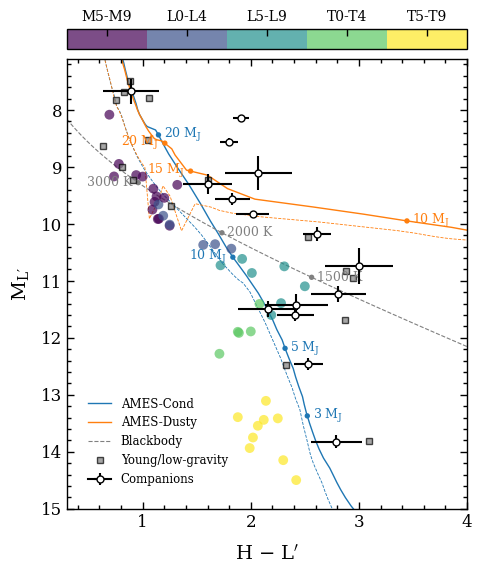

In [18]:
fig = plot_color_magnitude(boxes=boxes,
                           objects=objects,
                           mass_labels={'ames-cond': [(3., 'right'), (5., 'right'), (10., 'left'), (20., 'right')],
                                        'ames-dusty': [(10., 'right'), (15., 'left'), (20., 'left')]},
                           teff_labels={'planck': [(1500., 'right'), (2000., 'right'), (3000., 'left')]},
                           companion_labels=False,
                           field_range=('late M', 'late T'),
                           label_x=r'H $-$ L$^\prime$',
                           label_y=r'M$_\mathregular{L\prime}$',
                           xlim=(0.3, 4.),
                           ylim=(15., 7.1),
                           offset=(-0.08, -0.09),
                           legend=(0.04, 0.04),
                           output=None)

The [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function returned the [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object of the plot. The functionalities of [Matplotlib](https://matplotlib.org/stable/index.html) can be used for further customization of the plot. For example, the axes of the plot are stored at the `axes` attribute of `Figure`.

In [19]:
fig.axes

[<Axes: xlabel='H $-$ L$^\\prime$', ylabel='M$_\\mathregular{L\\prime}$'>,
 <Axes: >]